## Reads the GPIO from PointGrey cameras
#### these are encoded as a unsigned int16, you can read it using the `unpackbits` function

In [23]:
from labcams import parse_cam_log, unpackbits
import numpy as np

fname = 'C:\\Users\\Anne\\Bpod Local\\Data\\JC012\\SpatialSparrow\\Session Data\\JC012_SpatialSparrow_20200723_134738_cam1_00000000.camlog'

# Read the log
log,comm = parse_cam_log(fname)
# Parse bits as timestamps of rise(onsets) and fall (offsets)
onsets,offsets = unpackbits(log.var2)
# Or if you prefer parse bits as lines
bits = unpackbits(log.var2,output_binary=True)


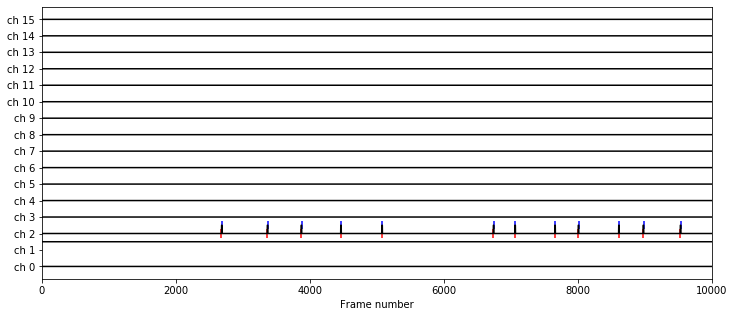

In [28]:
# plotting
%matplotlib inline
import pylab as plt
# plot bit lines
plt.figure(figsize=[12,5])
plt.plot(bits.T*0.5 + np.arange(bits.shape[0]),'k')
# plot events
for i,onkey in enumerate(onsets):
    plt.vlines(onsets[on],onkey-0.25,onkey+0.25,color='r')
    plt.vlines(offsets[on],onkey+.5-0.25,onkey+.5+0.25,color='b')
plt.yticks(np.arange(bits.shape[0]),['ch {0}'.format(i) for i in np.arange(bits.shape[0])]);
plt.xlabel('Frame number');
plt.xlim([0,10000]);